# Lesson 1
### 37 Mixed Breeds of Cats and Dogs

* To reload any edits to the libraries automatically
* matplotlib's output to be shown in the notebook itself

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

* All the necessary packages of fastaiv1 
* Vision for image based tasks

In [3]:
from fastai import *
from fastai.vision import *

## Dataset
Using Oxford-IIIT Pet Dataset with 12 breeds of Cats and 25 breeds of Dogs

### untar_data()
* untar_data() downloads and unzip it while download_data just downalods a zip
* it returns the path it was downloaded to
* default path is .fastai/data/

In [4]:
doc(untar_data)

untar_data [source] untar_data ( url : str , fname : PathOrStr = None , dest : PathOrStr = None , data = True ) 
 
 Download url if it doesn't exist to fname and un-tgz to folder dest 
 Show in docs

In [29]:
path = untar_data(url = URLs.PETS) 
path

PosixPath('/home/siddhant/.fastai/data/oxford-iiit-pet')

### ls() 
* shows the files in the directory of the invoking object

In [30]:
path.ls()

[PosixPath('/home/siddhant/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/siddhant/.fastai/data/oxford-iiit-pet/annotations')]

Pathlib.posixPath are new addition to python 

In [31]:
anno_path = path/'annotations'
img_path = path/'images'

### labels

* There are many ways of mapping data and labels - folder name as label, file name as label etc
* Lets look into pets data and how are they mapped

### get_image_files

* gets list of all file names of the images in the specified path


In [33]:
fnames = get_image_files(img_path)
fnames[:5]

[PosixPath('/home/siddhant/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_105.jpg'),
 PosixPath('/home/siddhant/.fastai/data/oxford-iiit-pet/images/Bengal_131.jpg'),
 PosixPath('/home/siddhant/.fastai/data/oxford-iiit-pet/images/Sphynx_38.jpg'),
 PosixPath('/home/siddhant/.fastai/data/oxford-iiit-pet/images/havanese_84.jpg'),
 PosixPath('/home/siddhant/.fastai/data/oxford-iiit-pet/images/scottish_terrier_1.jpg')]

* We know now that the labels are the file names

### ImageDataBunch

* Class having that holds the data for learner train/test/valid


### from_name_re()

* method under ImageDataBunch which deals with data having labels in the filename
* which can be extracted to Regex thus the name from_name_re

param 1 is the path of the images <br>
param 2 list file names of the images <br>
param 3 regex pattern
param 4 
param 5 
param 6 

### normalize()

* normalize the data to simialar scale

param imagenet_stats -> normalize according to imagenet data's stats


### show_batch()

* to see the data in respected datatype 

param 1 nxn matrix of data <br>
param 2 size of the figure

### classes()

* gives the classes that is found using the regex pattern 

### c()

* no. of classification classes for cllasification prob

In [43]:
pat = re.compile(r'/([^/]+)_\d+.jpg$')
data = ImageDataBunch.from_name_re(img_path, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64).normalize(imagenet_stats)

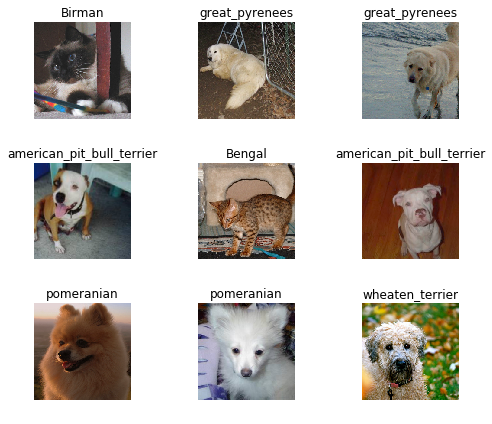

In [46]:
data.show_batch(rows=3, figsize=(7,6))

In [47]:
print(data.classes)
len(data.classes),data.c

['Egyptian_Mau', 'Bengal', 'Sphynx', 'havanese', 'scottish_terrier', 'american_bulldog', 'Ragdoll', 'newfoundland', 'japanese_chin', 'Birman', 'beagle', 'yorkshire_terrier', 'great_pyrenees', 'wheaten_terrier', 'samoyed', 'Bombay', 'boxer', 'pug', 'shiba_inu', 'pomeranian', 'Persian', 'leonberger', 'Maine_Coon', 'english_setter', 'english_cocker_spaniel', 'german_shorthaired', 'Abyssinian', 'basset_hound', 'saint_bernard', 'chihuahua', 'Russian_Blue', 'British_Shorthair', 'staffordshire_bull_terrier', 'keeshond', 'american_pit_bull_terrier', 'miniature_pinscher', 'Siamese']


(37, 37)

## Training

### create_cnn()

* creates a convolution learner
param 1 databunch object 
param 2 here resenet 34 pretrained weights are loaded and head is added newly with fresh weights
param 3 metrics

In [49]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('1')